PROBLEM STATEMENT

The airline industry experiences constant fluctuations in ticket prices due to various factors, such as, date, airline, duration etc. This machine learning model will help to predict the flight ticket prices based on the dependent factors, making it easy for the user to plan their trips more efficiently.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
trdf=pd.read_excel('/home/fathima/projects/flight-price-prediction/data/Data_Train.xlsx')

In [3]:
trdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
trdf.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
trdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


Insight

- The dataframe has 11 columns and 10000+ entries. 
- Entries with missing values can be dropped.
- 'Price' is the dependent feature and the rest are independent features.
- All the independent features are of object type.

In [7]:
trdf.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
trdf[trdf.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
trdf[trdf.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
trdf.dropna(inplace=True)

In [11]:
trdf.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
trdf.Price.value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: count, Length: 1870, dtype: int64

In [13]:
for i in trdf.columns:
    if i!= 'Price':
        print(f"Feature Name: {i}",'\n')
        print("Unique values: ", trdf[i].unique(),'\n')
        print("Total Number of Unique Values: ", len(trdf[i].unique()),'\n')
        print("Value Counts:",'\n', trdf[i].value_counts(),'\n')
        
        print("_"*100,'\n')

Feature Name: Airline 

Unique values:  ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 

Total Number of Unique Values:  12 

Value Counts: 
 Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64 

____________________________________________________________________________________________________ 

Feature Name: Date_of_Journey 

Unique values:  ['24/03/2019' '1/05/2

This is a regression problem as the dependent feature "Price" has continuous integer values.

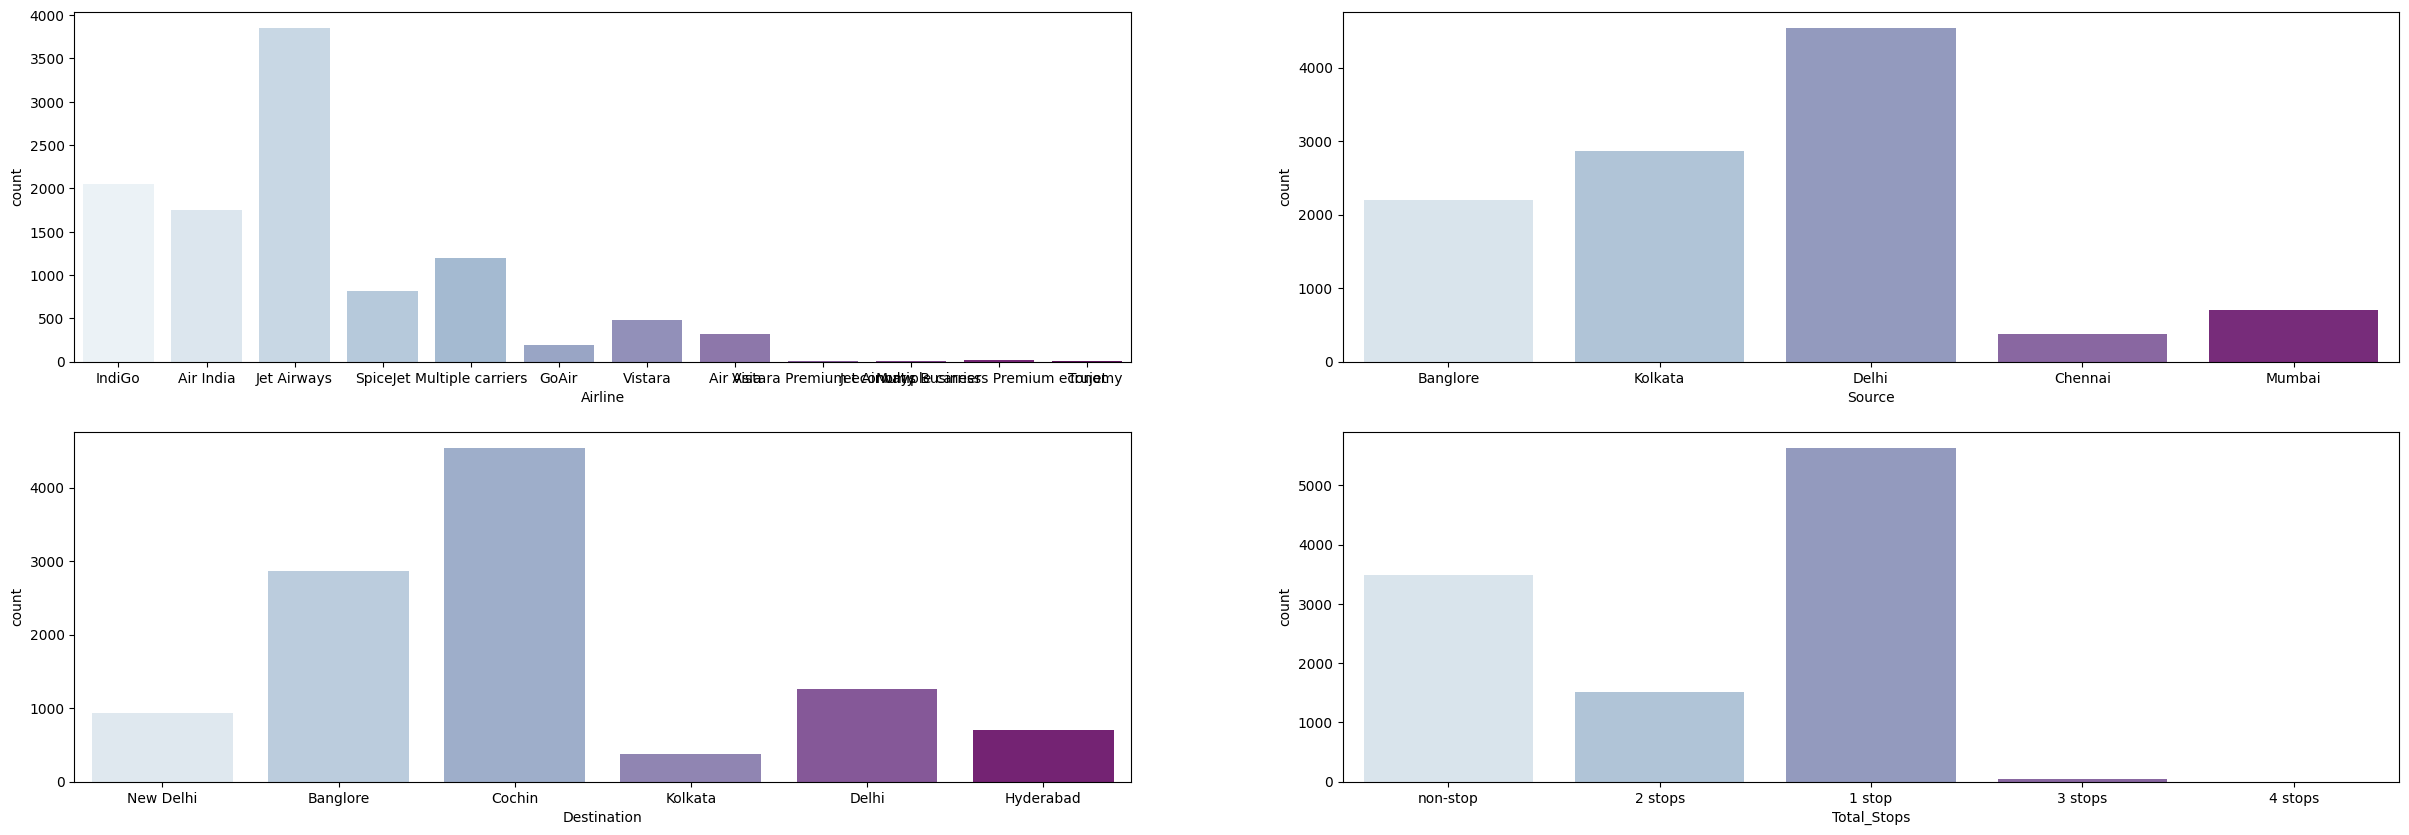

In [14]:
countplt = trdf[['Airline', 'Source', 'Destination','Total_Stops']]
fig , ax = plt.subplots(2,2,figsize = (30,10))    
for i , subplots in zip (countplt, ax.flatten()):  
  sns.countplot(x=countplt[i],data=trdf,ax=subplots,palette = 'BuPu')
plt.tight_layout
plt.show()

Insight

- There are a total of 12 different **airlines**, it is to be encoded.
- The **date of journey** is crucial as the flight prices are hugely determined by the day and month, it can be split into two seperate features.
- There are 5 different **sources** and they should be encoded.
- There are 6 different **destinations** which needs to be encoded.
- The **route** feature can be dropped as they are highly imbalanced and there's another similar feature named 'Total_Stops'.
- **Departure time** and **arrival time** can be useful for the prediction and they can be split into hour and minute.
- **Duration** of the flight might be useful for the prediction of price, it needs to be converted into an integer.
- The **total stops** can be easily encoded and used for prediction.
- The **additional info** feature doesn't necessarily give any useful information and they can be dropped.

In [15]:
for i in trdf.Source.unique():
    print(f"Airline from ",i,'\n')
    print(trdf[trdf.Source==i].Airline.value_counts())
    print("_"*100,'\n')

Airline from  Banglore 

Airline
Jet Airways                788
IndiGo                     523
Air India                  332
Vistara                    185
SpiceJet                   181
GoAir                       93
Air Asia                    89
Jet Airways Business         4
Vistara Premium economy      2
Name: count, dtype: int64
____________________________________________________________________________________________________ 

Airline from  Kolkata 

Airline
Jet Airways    1256
Air India       512
IndiGo          445
SpiceJet        300
Vistara         183
Air Asia        150
GoAir            25
Name: count, dtype: int64
____________________________________________________________________________________________________ 

Airline from  Delhi 

Airline
Jet Airways                          1586
Multiple carriers                    1196
Air India                             746
IndiGo                                705
SpiceJet                               87
Air Asia          

- All airline options are not available from every sources.

In [16]:
trdf.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [17]:
trdf['Date_of_Journey']=pd.to_datetime(trdf.Date_of_Journey,dayfirst=True)

In [18]:
trdf['Day']=trdf.Date_of_Journey.dt.day
trdf['Month']=trdf.Date_of_Journey.dt.month
trdf.drop(['Date_of_Journey'],axis=1,inplace=True)
trdf.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [19]:
trdf['Dep_Time']=pd.to_datetime(trdf.Dep_Time)


In [20]:
trdf['Dep_Hour']=trdf.Dep_Time.dt.hour
trdf['Dep_Min']=trdf.Dep_Time.dt.minute
trdf.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
trdf['Arrival_Time']=pd.to_datetime(trdf.Arrival_Time)

In [22]:
trdf['Arr_Hour']=trdf.Arrival_Time.dt.hour
trdf['Arr_Min']=trdf.Arrival_Time.dt.minute
trdf.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
trdf.drop(['Route','Additional_Info'],axis=1,inplace=True)
trdf.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25


In [24]:
trdf['Duration']=  trdf['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
trdf.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35


In [25]:
trdf.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
trdf['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [27]:

trdf = pd.get_dummies(trdf, columns=["Airline","Source", "Destination"],dtype=int)
trdf.head(3)

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,0,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,1,0,0,0,1,0,0,0,0


In [28]:
trdf.shape

(10682, 32)

In [29]:
trdf.head()

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,0,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,1,0,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,1,0,1,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int64
 2   Price                                      10682 non-null  int64
 3   Day                                        10682 non-null  int32
 4   Month                                      10682 non-null  int32
 5   Dep_Hour                                   10682 non-null  int32
 6   Dep_Min                                    10682 non-null  int32
 7   Arr_Hour                                   10682 non-null  int32
 8   Arr_Min                                    10682 non-null  int32
 9   Airline_Air Asia                           10682 non-null  int64
 10  Airline_Air India                          10682 no

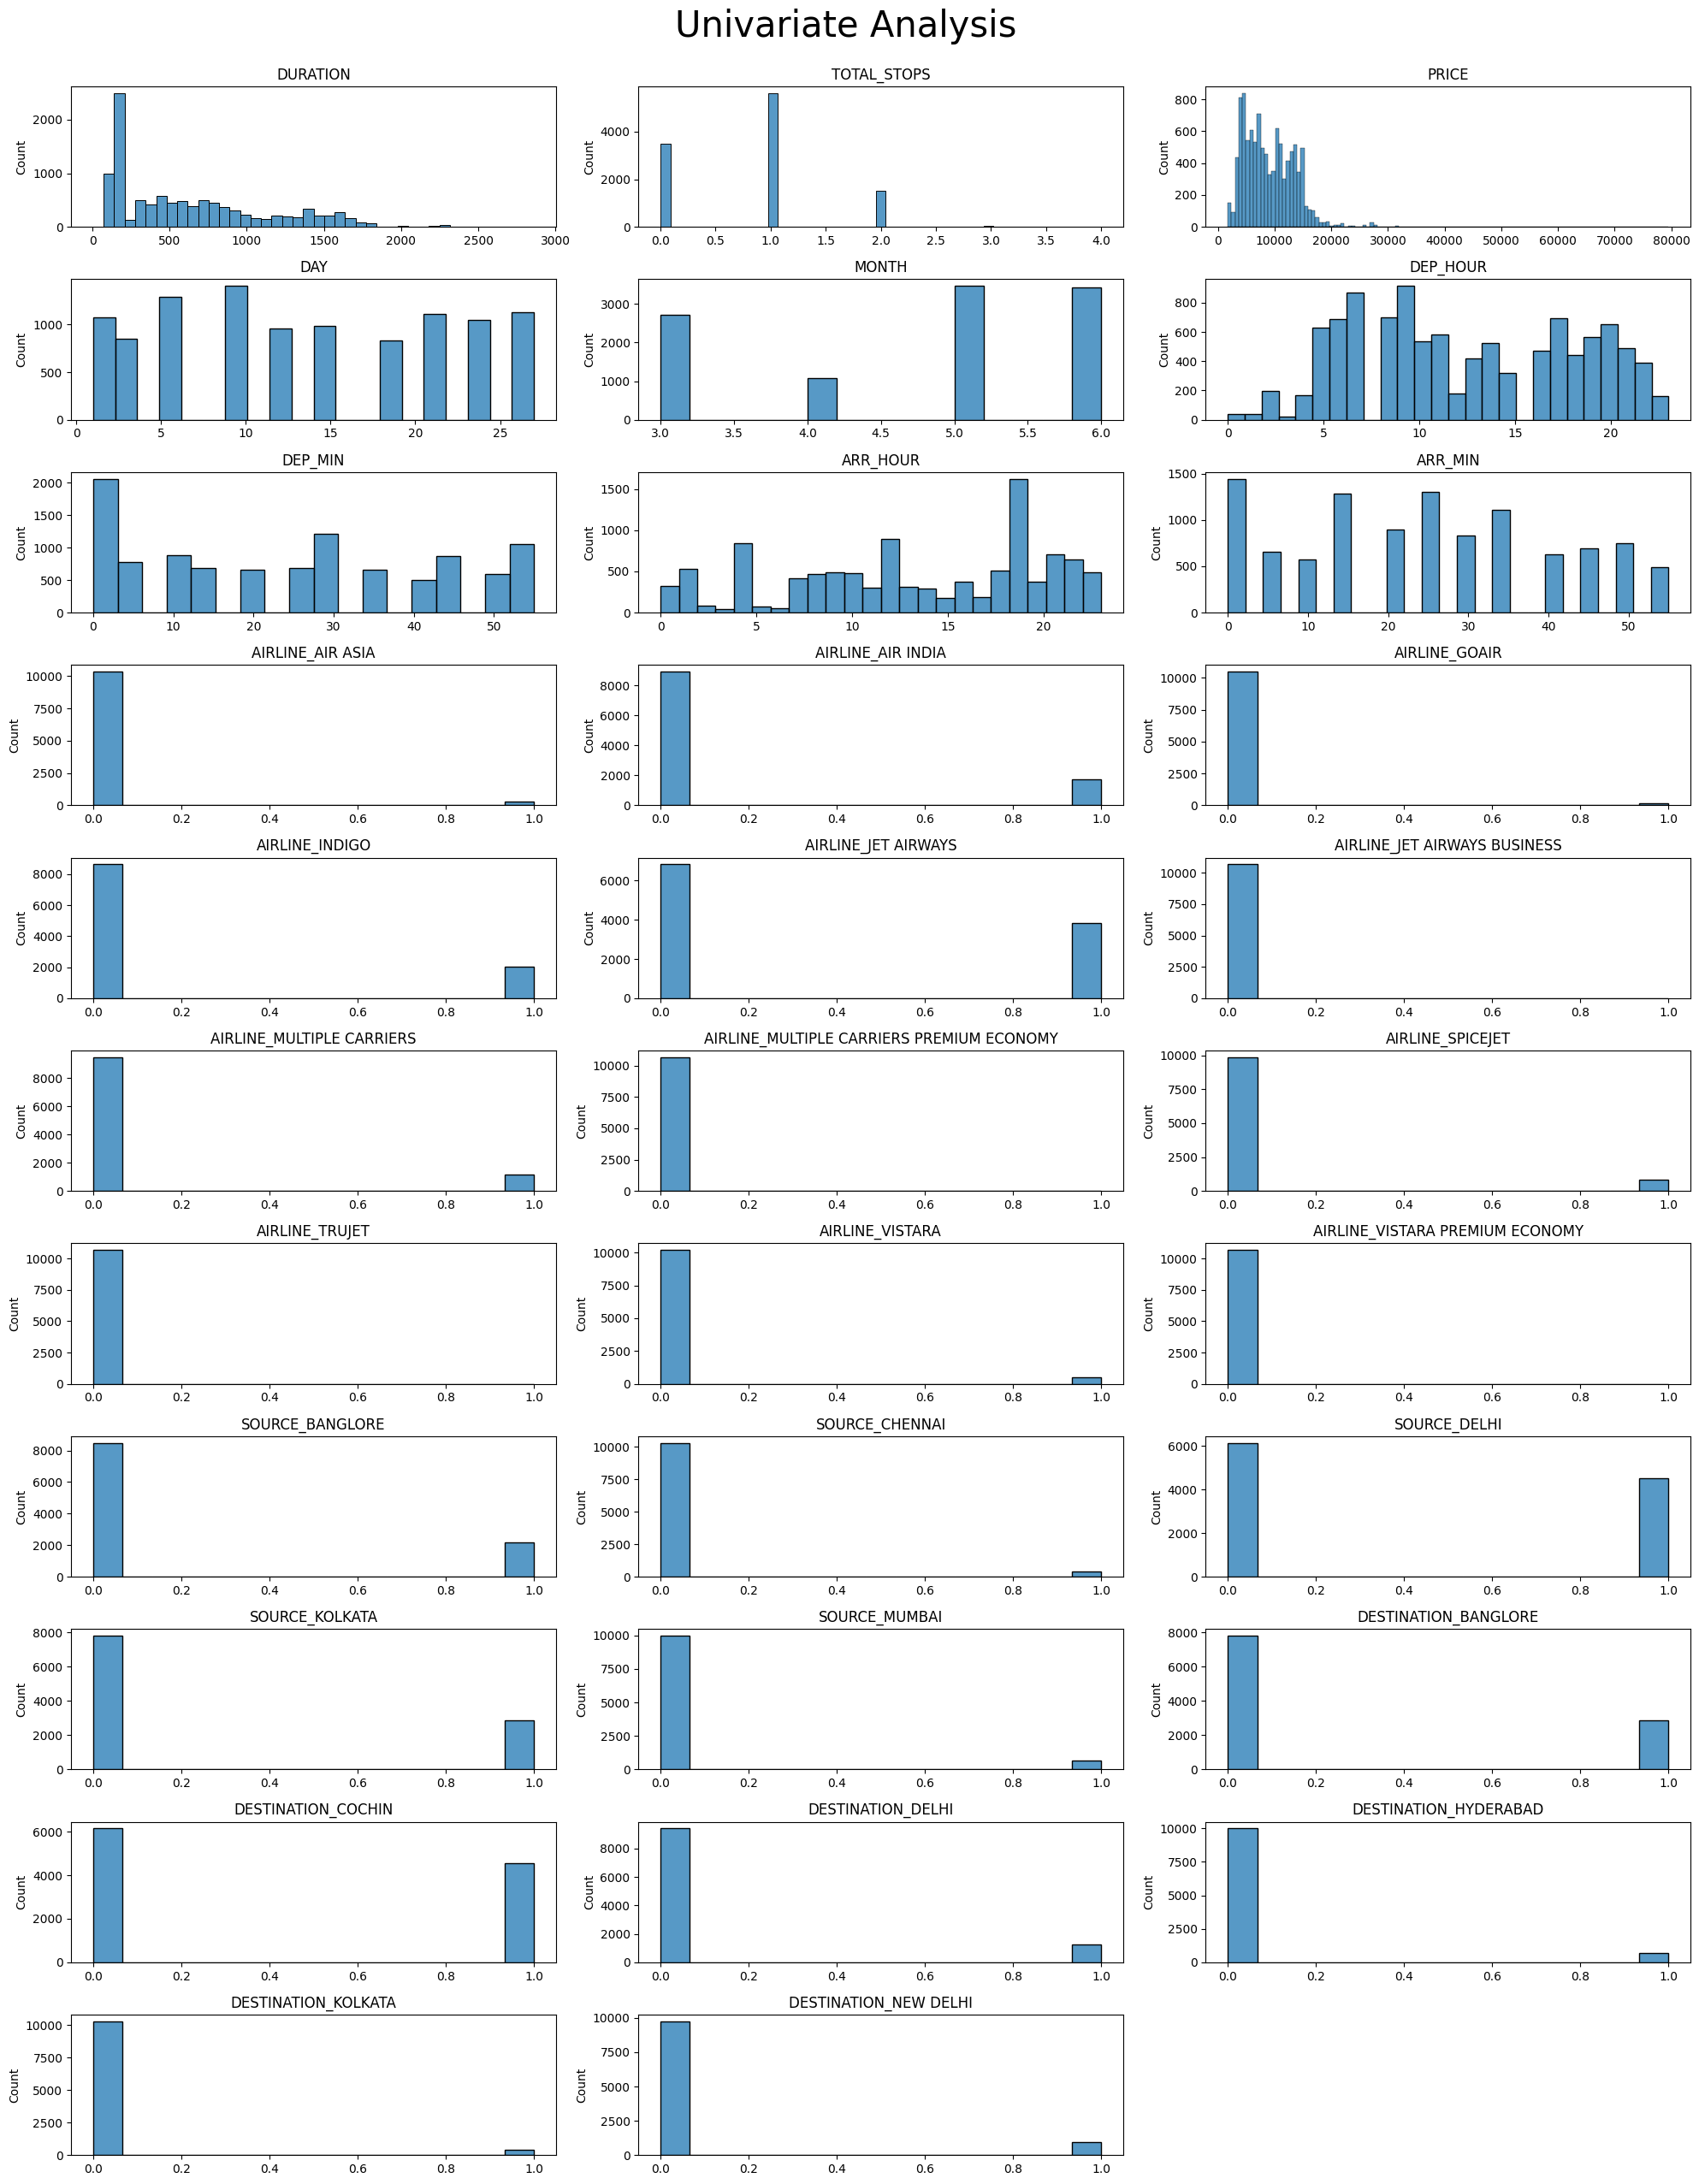

In [31]:
plt.figure(figsize=(20, 26))
plt.suptitle("Univariate Analysis \n", fontsize=30, ha='center', va='top')


for n, col in enumerate(trdf.columns):
    ax = plt.subplot(11, 3, n + 1)

    sns.histplot(data=trdf[col])
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


In [32]:
corr=trdf.corr()
corr

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663,-0.101836,...,-0.190651,0.295776,0.124437,-0.234809,0.124437,0.295776,-0.340182,-0.234809,-0.190651,0.006732
Total_Stops,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,-0.094423,...,-0.234758,0.490170,0.032761,-0.260752,0.032761,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,-0.133050,...,-0.179223,0.270676,0.009358,-0.230755,0.009358,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Day,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,0.008926,...,0.006611,0.100088,-0.060558,-0.014030,-0.060558,0.100088,0.002632,-0.014030,0.006611,-0.075254
Month,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.005652,...,0.005650,0.139222,0.087177,-0.039352,0.087177,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_Hour,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.045960,...,-0.014846,-0.118780,0.155471,-0.017292,0.155471,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_Min,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,0.158211,...,0.067110,-0.085534,-0.024238,0.037705,-0.024238,-0.085534,0.003200,0.037705,0.067110,0.107129
Arr_Hour,0.051531,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.034993,...,-0.014795,-0.006790,0.054693,-0.033512,0.054693,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arr_Min,-0.069663,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,0.078261,...,-0.030493,-0.209882,0.118573,0.081196,0.118573,-0.209882,0.095250,0.081196,-0.030493,0.021271
Airline_Air Asia,-0.101836,-0.094423,-0.133050,0.008926,0.005652,0.045960,0.158211,-0.034993,0.078261,1.000000,...,-0.033742,-0.061711,0.079726,-0.046355,0.079726,-0.061711,0.056552,-0.046355,-0.033742,-0.019163


<Axes: >

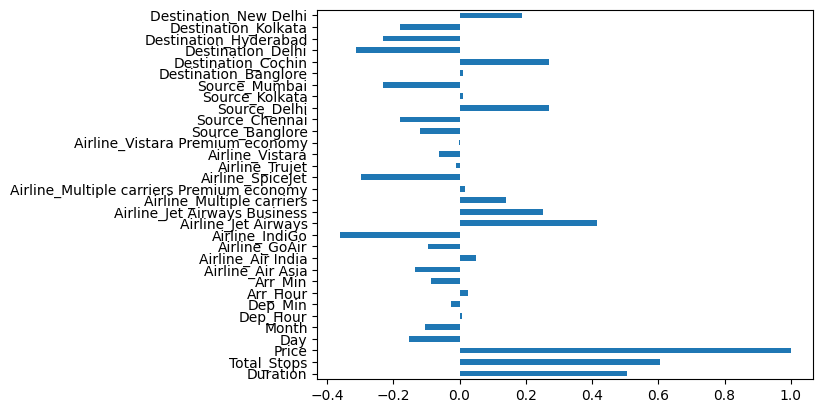

In [33]:

corr.Price.plot(kind='barh')

Insight

- Total Stops and Duration has the highest influence on the price.

<Axes: >

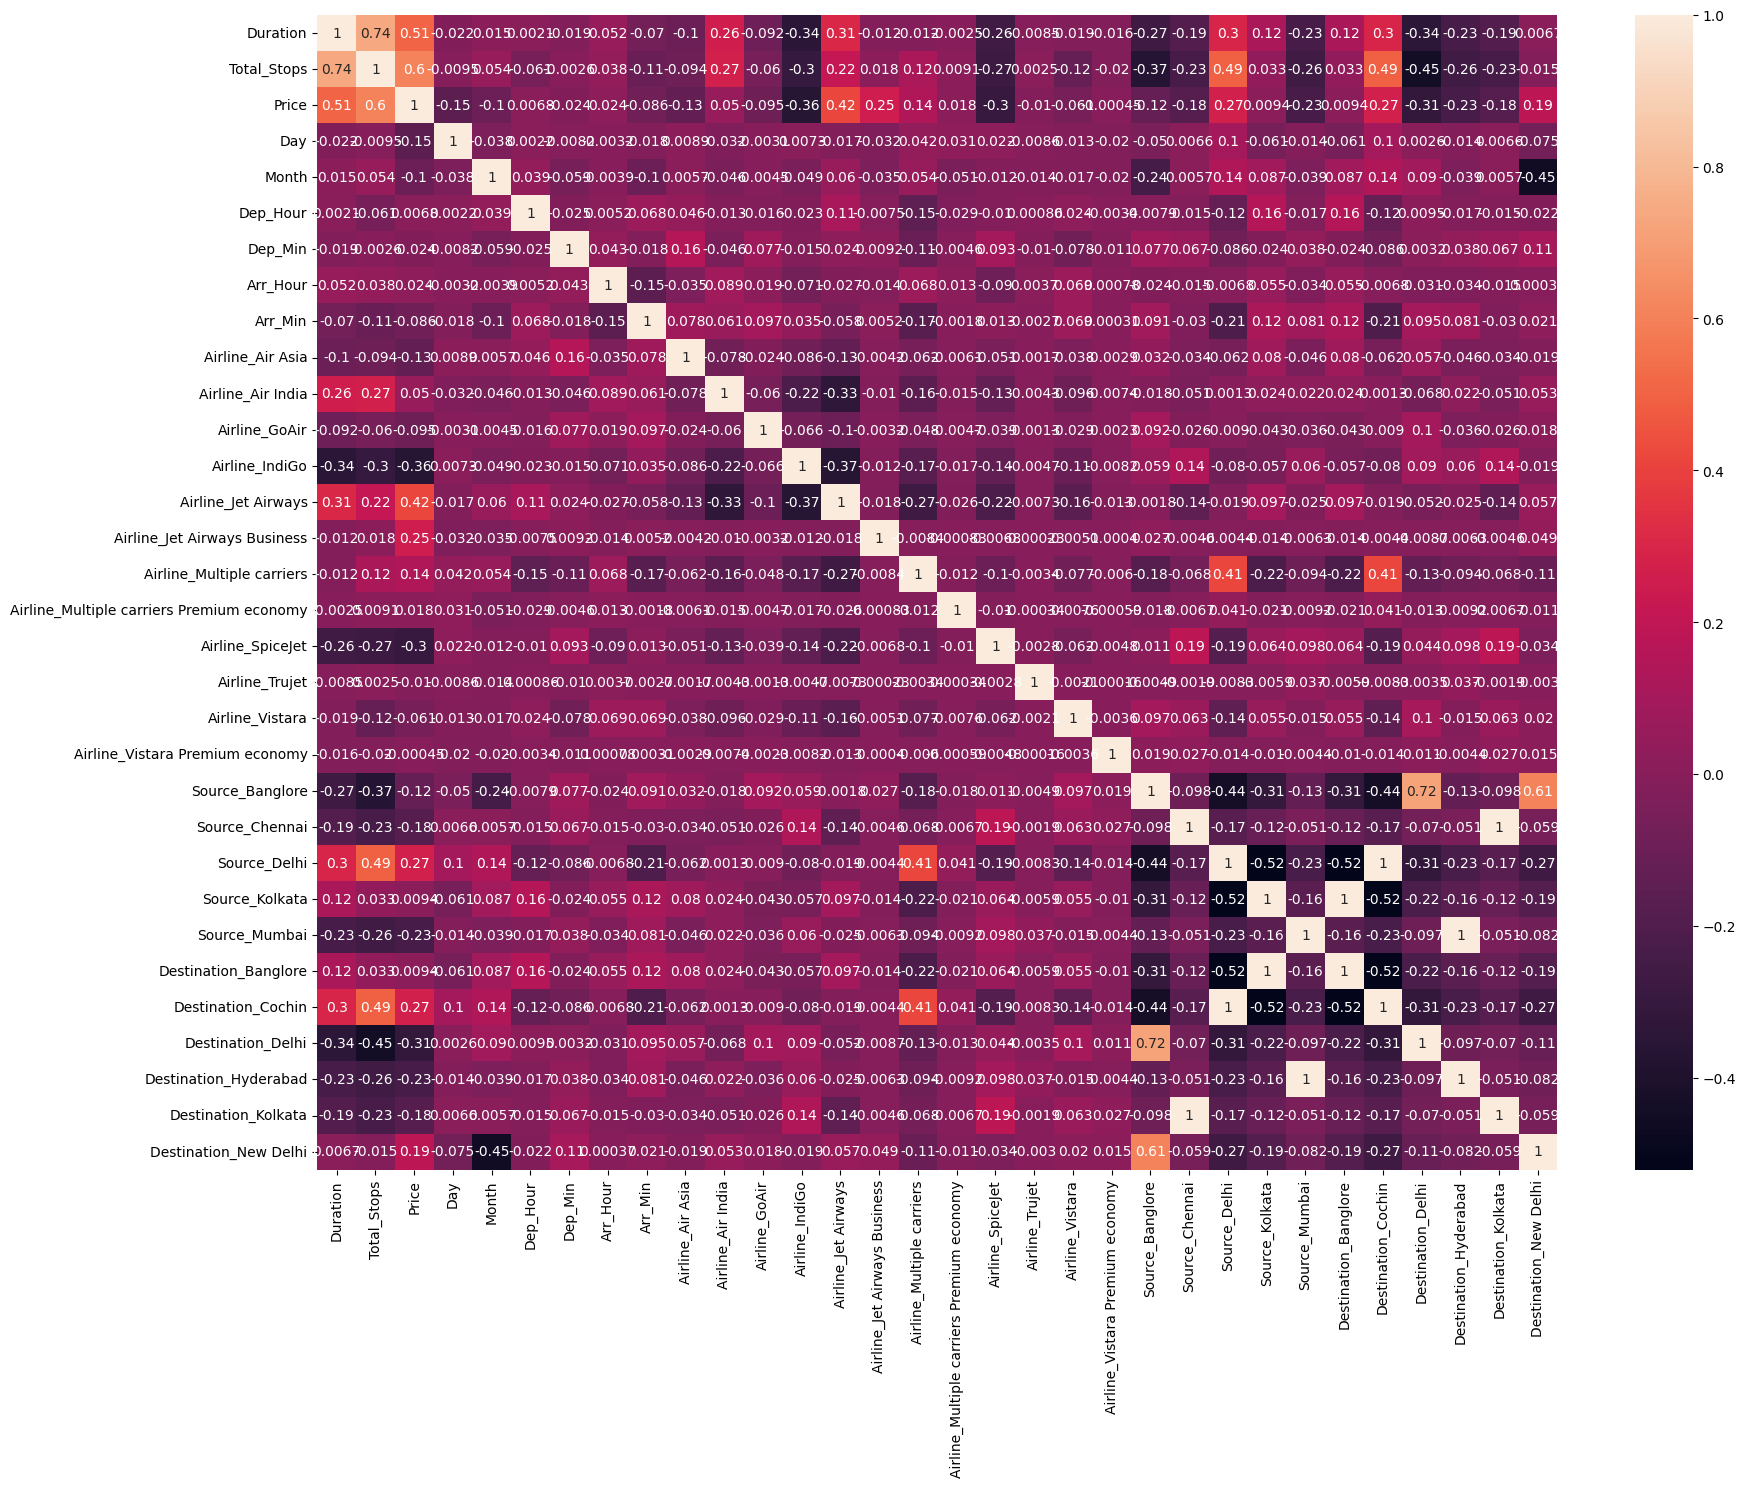

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [35]:
trdf

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,0,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,1,0,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,1,0,1,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,9,4,19,55,22,25,1,...,0,0,1,0,1,0,0,0,0,0
10679,155,0,4145,27,4,20,45,23,20,0,...,0,0,1,0,1,0,0,0,0,0
10680,180,0,7229,27,4,8,20,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,0,12648,1,3,11,30,14,10,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
x=trdf.drop(['Price'],axis=1)
y=trdf.Price

In [37]:
x

,Duration,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,...,0,0,1,0,1,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,9,4,19,55,22,25,1,0,...,0,0,1,0,1,0,0,0,0,0
10679,155,0,27,4,20,45,23,20,0,1,...,0,0,1,0,1,0,0,0,0,0
10680,180,0,27,4,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,160,0,1,3,11,30,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [40]:
x_train

,Duration,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10005,645,1,27,5,8,30,19,15,0,0,...,0,1,0,0,0,1,0,0,0,0
3684,1505,1,9,5,11,30,12,35,0,0,...,0,1,0,0,0,1,0,0,0,0
1034,380,1,24,4,15,45,22,5,0,0,...,0,1,0,0,0,1,0,0,0,0
3909,765,1,21,3,12,50,1,35,0,0,...,0,1,0,0,0,1,0,0,0,0
3088,1560,2,24,6,17,15,19,15,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1165,1,27,3,9,0,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
5191,400,1,9,5,14,5,20,45,0,0,...,0,0,1,0,1,0,0,0,0,0
5390,760,1,15,5,12,50,1,30,0,0,...,0,1,0,0,0,1,0,0,0,0
860,165,0,3,3,0,40,3,25,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
x_test

,Duration,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,625,2,21,5,15,5,1,30,0,0,...,0,1,0,0,0,1,0,0,0,0
3544,540,1,3,6,10,35,19,35,0,0,...,0,1,0,0,0,1,0,0,0,0
9291,765,1,9,5,20,20,9,5,0,0,...,0,0,1,0,1,0,0,0,0,0
5032,140,0,24,5,14,45,17,5,0,0,...,1,0,0,0,0,0,0,0,1,0
2483,335,1,21,5,22,50,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,780,1,27,6,8,0,21,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9871,150,0,6,3,17,15,19,45,0,0,...,0,0,1,0,1,0,0,0,0,0
10063,870,1,21,4,7,55,22,25,1,0,...,0,1,0,0,0,1,0,0,0,0
8802,1015,1,24,3,6,30,23,25,0,0,...,0,0,1,0,1,0,0,0,0,0


In [42]:
y_train

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7270     10262
Name: Price, Length: 8545, dtype: int64

In [43]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import *

In [45]:
models={
    'KNeighbors':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ada Boost':AdaBoostRegressor()

}

KNeighbors
__________


Train Score =  0.7103412578310949
Test Score =  0.5358230970161013

 Model performance 

MAE :  1895.5235376696303
MSE :  10008608.526513804
RMSE :  3163.63849491591
R2 Score :  0.5358230970161013


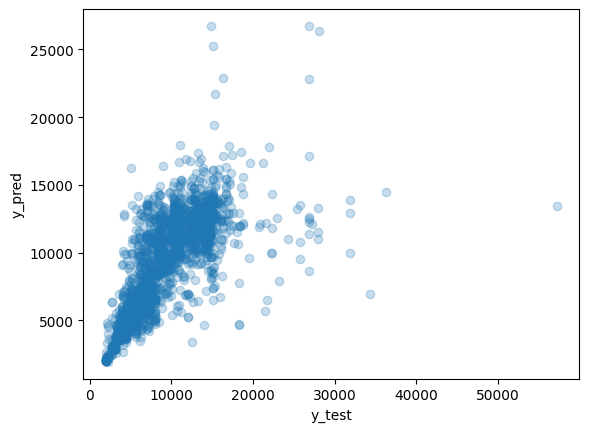

____________________________________________________________________________________________________


Decision Tree
__________


Train Score =  0.9692484150527355
Test Score =  0.7762483412155413

 Model performance 

MAE :  1301.0745203556387
MSE :  4824545.869335126
RMSE :  2196.484889393762
R2 Score :  0.7762483412155413


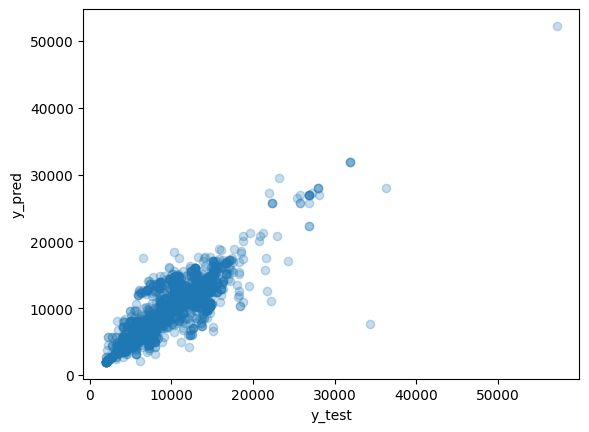

____________________________________________________________________________________________________


Random Forest
__________


Train Score =  0.9527239115397864
Test Score =  0.8196317027238397

 Model performance 

MAE :  1161.7428252927857
MSE :  3889111.384961726
RMSE :  1972.0830066104536
R2 Score :  0.8196317027238397


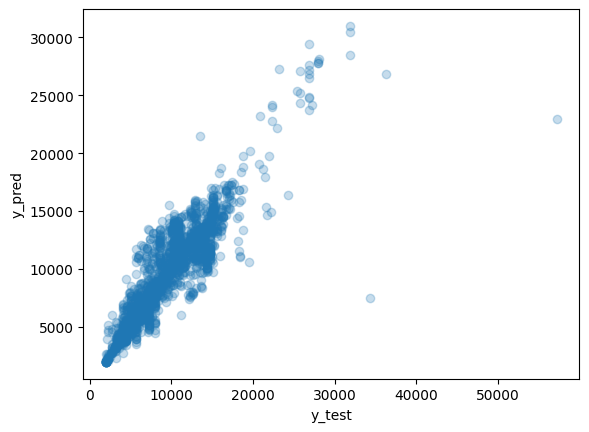

____________________________________________________________________________________________________


Gradient Boosting
__________


Train Score =  0.7867209480046053
Test Score =  0.7924069669644753

 Model performance 

MAE :  1509.6977691781553
MSE :  4476132.67081556
RMSE :  2115.6872809599154
R2 Score :  0.7924069669644753


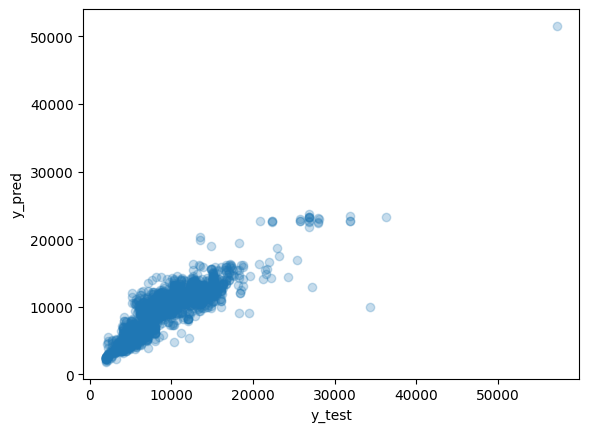

____________________________________________________________________________________________________


Ada Boost
__________


Train Score =  0.4764670050823745
Test Score =  0.47963901709377077

 Model performance 

MAE :  2779.904300850645
MSE :  11220052.822320301
RMSE :  3349.6347296862536
R2 Score :  0.47963901709377077


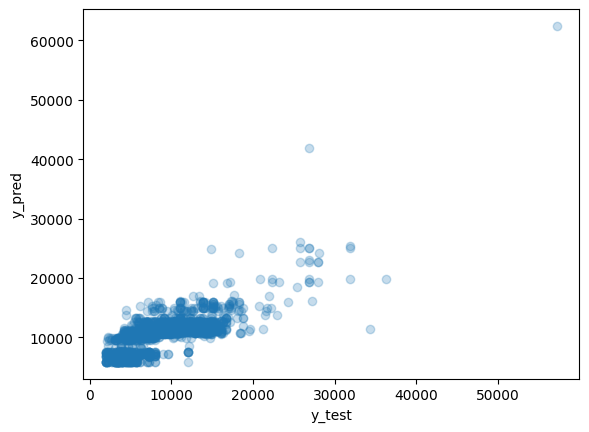

____________________________________________________________________________________________________




In [46]:

for model_name,model in models.items():
    model.fit(x_train,y_train)

    Y_pred=model.predict(x_test)

    print(model_name)
    print('_'*10)

    print('\n')

    print("Train Score = ",model.score(x_train,y_train))
    print("Test Score = ",model.score(x_test,y_test))

    print('\n Model performance \n')
    print('MAE : ', mean_absolute_error(y_test,Y_pred))
    print('MSE : ',mean_squared_error(y_test,Y_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,Y_pred)))
    print('R2 Score : ',r2_score(y_test,Y_pred))

    plt.scatter(y_test,Y_pred,alpha=0.25)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

    print('_'*100)

    print('\n')


Insight

- Random Forest Regressor model gives the highest accuracy.

In [47]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
params={'max_depth': list(range(5,55,5)),
        'max_features': ['log2', 'sqrt'],
        'min_samples_leaf': list(range(1,6)),
        'min_samples_split': list(range(1,100,2)),
        'n_estimators': list(range(100,1300,100))}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
clf=RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=30, cv=10, verbose=2, n_jobs=6)
clf.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   6.7s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   7.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   9.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   6.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   9.6s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   7.5s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   5.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=47, n_estimators=400; total time=   5.6s
[CV] END max_depth=25, max_featu

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=6,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
                                                              21, 23, 25, 27,
                                                              29, 31, 33, 35,
                                                              37, 39, 41, 43,
                                                              45, 47, 49, 51,
                                                              53, 55, 57, 59, ...],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [50]:
clf.best_params_

{'n_estimators': 700,
 'min_samples_split': 13,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [70]:
import os
import pickle

directory = "/home/fathima/projects/flight-price-prediction/artifacts"
os.makedirs(directory, exist_ok=True)

data=clf
with open(os.path.join(directory, "pred_model.pkl"), "wb") as f:
    pickle.dump(data, f)

data2=trdf
with open(os.path.join(directory,'modified_train_data.pkl'),"wb") as f:
    pickle.dump(data2,f)


In [71]:
best_model = pickle.load(open('/home/fathima/projects/flight-price-prediction/artifacts/pred_model.pkl','rb'))


In [72]:
best_model.n_features_in_

31

In [73]:
best_model.feature_names_in_

array(['Duration', 'Total_Stops', 'Day', 'Month', 'Dep_Hour', 'Dep_Min',
       'Arr_Hour', 'Arr_Min', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [74]:
pred=best_model.predict(x_test)

In [75]:
r2_score(y_test,pred)

0.8289936949382449

In [76]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})

,Actual Value,Predicted Value,Difference
6075,16655,16395.659807,259.340193
3544,4959,6146.620503,-1187.620503
9291,9187,8561.919931,625.080069
5032,3858,3833.194795,24.805205
2483,12898,13954.310737,-1056.310737
...,...,...,...
9797,7408,10683.118097,-3275.118097
9871,4622,4931.313888,-309.313888
10063,7452,6688.646361,763.353639
8802,8824,12011.208554,-3187.208554


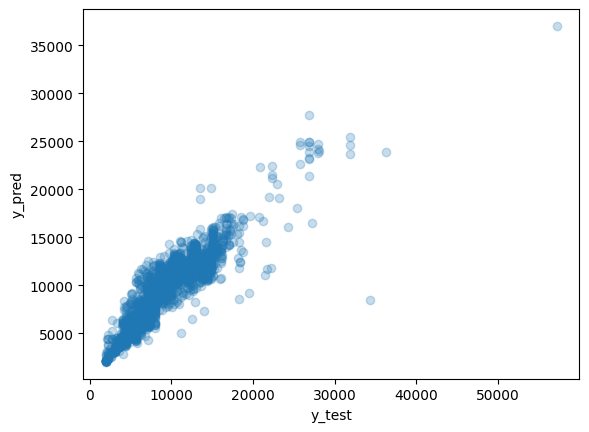

In [77]:
plt.scatter(y_test, pred, alpha = 0.25)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [78]:
def test_data_transformer(df: pd.DataFrame)->pd.DataFrame:
    ft=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
    missing_ft=[]
    for i in ft:
        if i not in df.columns:
            missing_ft.append(i)

    if len(missing_ft)==0:

        drop_ft=['Route','Additional_Info']
        for i in drop_ft:
            if i in df.columns:
                df.drop(columns=[i],axis=1,inplace=True)

        df.dropna(inplace=True)

        df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
        df['Day'] = df['Date_of_Journey'].dt.day
        df['Month'] = df['Date_of_Journey'].dt.month
        df.drop(['Date_of_Journey'], axis=1, inplace=True)

        df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
        df['Dep_Hour'] = df['Dep_Time'].dt.hour
        df['Dep_Min'] = df['Dep_Time'].dt.minute
        df.drop(['Dep_Time'], axis=1, inplace=True)

        df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
        df['Arr_Hour'] = df['Arrival_Time'].dt.hour
        df['Arr_Min'] = df['Arrival_Time'].dt.minute
        df.drop(['Arrival_Time'], axis=1, inplace=True)

        df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

        df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

        airlines=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir',
                 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business',
                'Multiple carriers Premium economy', 'Trujet']
        source=['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
        destination=['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
        
        if len(airlines)>len(df.Airline.unique()):
            for i in set(airlines).difference(list(df.Airline.unique())):
                df.loc[len(df.index)]=[i,'Mumbai','Hyderabad', 180, 1, 12, 8, 2, 30, 5, 30]
            

        df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], dtype=int)

        req_cols = ['Duration', 'Total_Stops', 'Day', 'Month', 'Dep_Hour', 'Dep_Min',
       'Arr_Hour', 'Arr_Min', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']
        
        missing_cols=[]

        for i in req_cols:
            if i not in df.columns:
                missing_cols.append(i)
        
        if len(missing_cols)==0:
            return df
        else:
            raise Exception(f"Missing features in test dataset: {missing_cols}")
        
    else:
        raise Exception(f"Missing features in test dataset: {missing_ft}")



In [79]:
tsdf=pd.read_excel('/home/fathima/projects/flight-price-prediction/data/Test_set.xlsx')
tsdf.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [80]:
X_test=test_data_transformer(tsdf)

In [64]:
X_test.head(10)

,Duration,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
1,240,1,12,5,6,20,10,20,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1425,1,21,5,19,15,19,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,780,1,21,5,8,0,21,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,170,0,24,6,23,55,2,45,1,0,...,0,0,0,0,0,0,1,0,0,0
5,1100,1,12,6,18,15,12,35,0,0,...,0,1,0,0,0,1,0,0,0,0
6,905,1,12,3,7,30,22,35,0,1,...,0,0,0,0,0,0,0,0,0,1
7,315,1,1,5,15,15,20,30,0,0,...,0,0,1,0,1,0,0,0,0,0
8,165,0,15,3,10,10,12,55,0,0,...,0,0,1,0,1,0,0,0,0,0
9,365,1,18,5,16,30,22,35,0,0,...,0,0,1,0,1,0,0,0,0,0


In [81]:
X_test.tail()

,Duration,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2667,155,0,27,3,14,20,16,55,0,0,...,0,0,1,0,1,0,0,0,0,0
2668,395,1,6,3,21,50,4,25,0,0,...,0,1,0,0,0,1,0,0,0,0
2669,915,1,6,3,4,0,19,15,0,1,...,0,1,0,0,0,1,0,0,0,0
2670,860,1,15,6,4,55,19,15,0,0,...,0,1,0,0,0,1,0,0,0,0
2671,180,1,12,8,2,30,5,30,0,0,...,0,0,0,1,0,0,0,1,0,0


In [82]:
test_pred=best_model.predict(X_test)

In [83]:
test_pred

array([12032.62316832,  4456.19673855, 14282.6714278 , ...,
       13353.5705925 ,  8601.71944135,  7104.46791868])

In [84]:
tsdf=pd.read_excel('/home/fathima/projects/flight-price-prediction/data/Test_set.xlsx')
tsdf['Price']=test_pred[:-1]
tsdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,12032.623168
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4456.196739
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,14282.671428
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,11103.924551
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4383.383985
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9655.054762
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,5240.333700
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,14962.442199
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,13353.570592


In [85]:
tsdf.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)